In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as pl
import matplotlib
matplotlib.rcParams['font.size'] = 12

import chronos as cr

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


## long (30-minute) cadence 

In [2]:
l = cr.LongCadence(toiid=837)

Available sectors: [10, 11]
Using sector=10.


Searching targetpixelfile using Tesscut
Applying data quality mask identified in Data Release Notes (sector 10):
t>1570.8762|t<1581.78453|t>1584.72342



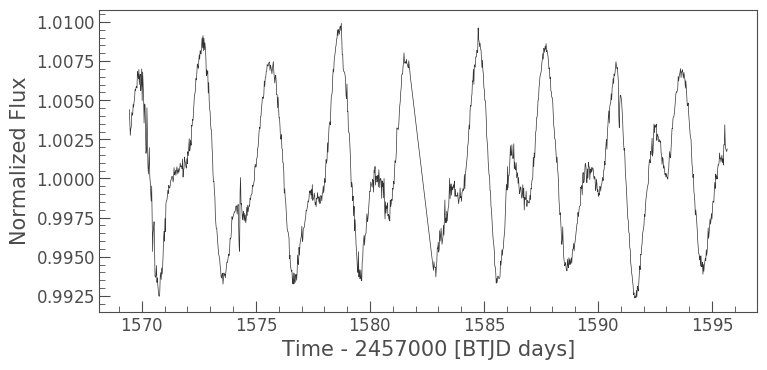

In [3]:
lc = l.make_custom_lc()
lc.plot();

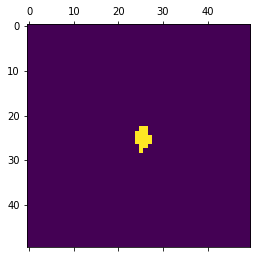

In [4]:
# show aperture mask
pl.matshow(l.aper_mask)

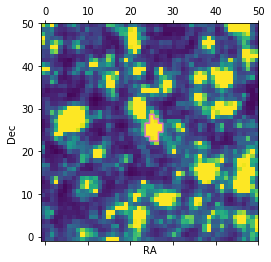

In [5]:
#show tpf with aperture mask
img = np.median(l.tpf_tesscut.flux, axis=0)
cr.plot_aperture_outline(img, mask=l.aper_mask)

### varying apertures

Searching targetpixelfile using Tesscut
Applying data quality mask identified in Data Release Notes (sector 10):
t>1570.8762|t<1581.78453|t>1584.72342

Searching targetpixelfile using Tesscut
Applying data quality mask identified in Data Release Notes (sector 10):
t>1570.8762|t<1581.78453|t>1584.72342

Brightest star detected is near the edges.
Aperture mask is placed at the center instead.

Searching targetpixelfile using Tesscut
Applying data quality mask identified in Data Release Notes (sector 10):
t>1570.8762|t<1581.78453|t>1584.72342

Searching targetpixelfile using Tesscut
Applying data quality mask identified in Data Release Notes (sector 10):
t>1570.8762|t<1581.78453|t>1584.72342



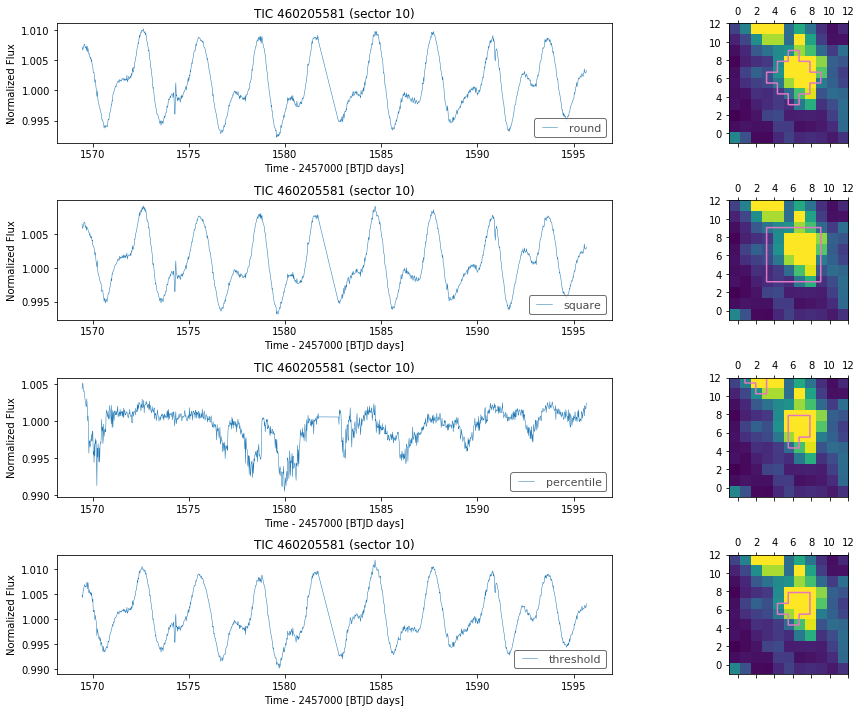

In [16]:
#custom lightcurves with varying apertures
masks = ['round','square','percentile','threshold']
kwargs = {'aper_radius': 2, 'percentile': 95, 'threshold_sigma': 5}

fig, axs = pl.subplots(len(masks),2, figsize=(15,10))

custom_lcs = {}
for n,sap_mask in enumerate(masks):
    lc = l.make_custom_lc(sap_mask=sap_mask, tpf_size=(12,12), **kwargs)
    lc.plot(ax=axs[n,0],label=sap_mask)
    custom_lcs[sap_mask] = lc
    axs[n,0].set_title(f'TIC {l.ticid} (sector {lc.sector})')
    
    tpf = l.tpf_tesscut.cutout(size=12)
    img = np.median(tpf.flux, axis=0)
    _ = cr.plot_aperture_outline(img, mask=l.aper_mask, imgwcs=tpf.wcs, ax=axs[n,1])
fig.tight_layout()

Querying Gaia DR2 catalog for 157.037 -64.5052 within 60.0 arcsec.



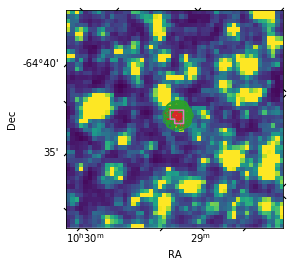

In [26]:
depth = l.toi_params['Depth (ppm)']/1e6
kmax = 1
gaia_sources = l.query_gaia_dr2_catalog(radius=60)
target_gaiaid = gaia_sources.iloc[0]['source_id']
tpf = l.tpf_tesscut#.cutout(size=10) #cutout results to incorrect positions
cr.plot_gaia_sources_on_tpf(tpf, target_gaiaid=target_gaiaid, sap_mask=sap_mask,
                            gaia_sources=gaia_sources, depth=depth, **kwargs)

Querying Gaia DR2 catalog for 157.037 -64.5052 within 60.0 arcsec.



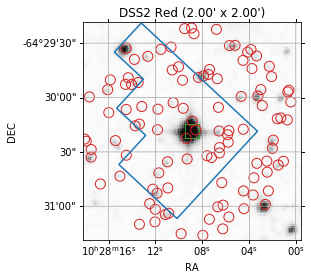

In [27]:
from astropy import units as u

aper_mask = 'threshold'
tpf = l.tpf_tesscut
gaiaid = l.gaiaid
gaia_sources = l.query_gaia_dr2_catalog(radius=60)

ax = cr.plot_gaia_sources_on_survey(tpf, gaiaid, gaia_sources, fov_rad=2*u.arcmin, 
                           survey='DSS2 Red', sap_mask=aper_mask, verbose=False, threshold_sigma=5)

Brightest star detected is near the edges.
Aperture mask is placed at the center instead.



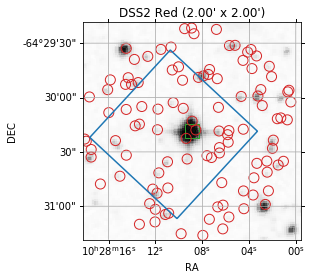

In [28]:
aper_mask = 'square'
fig = cr.plot_gaia_sources_on_survey(tpf, gaiaid, gaia_sources, fov_rad=2*u.arcmin, 
                           survey='DSS2 Red', sap_mask=aper_mask, verbose=False, aper_radius=1)

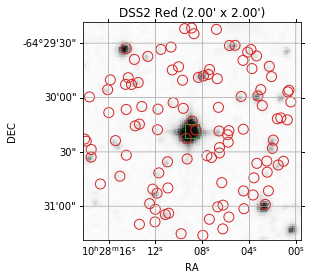

In [29]:
aper_mask = 'round'
fig = cr.plot_gaia_sources_on_survey(tpf, gaiaid, gaia_sources, fov_rad=2*u.arcmin, 
                           survey='DSS2 Red', sap_mask=aper_mask, verbose=False, aper_radius=1)

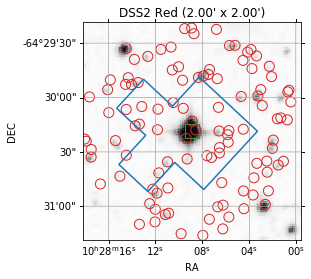

In [30]:
aper_mask = 'percentile'
fig = cr.plot_gaia_sources_on_survey(tpf, gaiaid, gaia_sources, fov_rad=2*u.arcmin, 
                           survey='DSS2 Red', sap_mask=aper_mask, verbose=False, percentile=95)

### CDIPS method

Querying Gaia DR2 catalog for 157.037 -64.5052 within 3.0 arcsec.



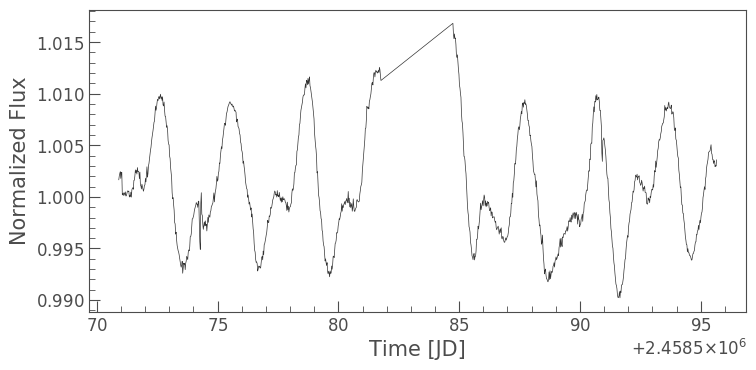

In [6]:
lc = l.get_cdips_lc() #a method that calls CDIPS class
lc.plot();

Text(0.5,1,'TIC 460205581 (sector 10)')

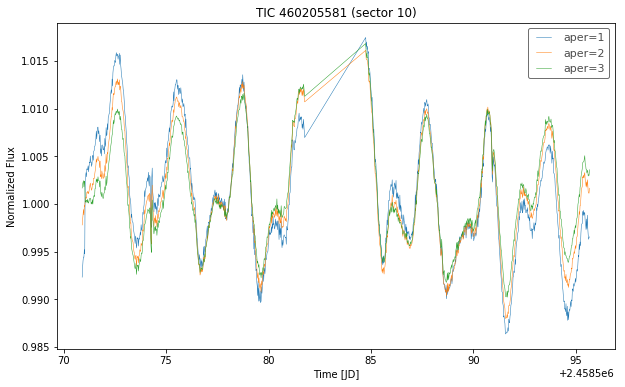

In [32]:
#CDIPS
cdips_lcs = {}
fig, ax = pl.subplots(1,1, figsize=(10,6))
for aper in [1,2,3]:
    lc = l.get_cdips_lc(sector=11, aper_idx=aper, verbose=False)
    lc.plot(ax=ax, label=f'aper={aper}')
    cdips_lcs[aper] = lc
ax.set_title(f'TIC {l.ticid} (sector {lc.sector})')

### CDIPS class

In [19]:
import chronos as cr

t = cr.Target(toiid=837)
t.query_gaia_dr2_catalog(return_nearest_xmatch=True)
t.gaiaid

Querying Gaia DR2 catalog for 157.037 -64.5052 within 3.0 arcsec.



5251470948229949568

In [20]:
t.get_all_sectors()

[10, 11]

The target is along galactic plane
* [youtube: sector 10](https://www.youtube.com/watch?v=hbGg8oU1qNM)
* [youtube: sector 11](https://www.youtube.com/watch?v=E_wpg9mZ5u4)

In [33]:
cdips = cr.CDIPS(gaiaDR2id=t.gaiaid, sector=7, aper_idx=3, lctype='flux', verbose=False)

In [34]:
#catalog reference(s) which claimed cluster membership
cdips.catalog_ref

'Kharchenko2013,Kounkel_2019,CantatGaudin_2018,GaiaCollaboration2018_tab1a'

In [35]:
#star name(s) in catalog ref
cdips.catalog_gaiaids

'786691642,5251470948229949568,5251470948229949568,5251470948229949568'

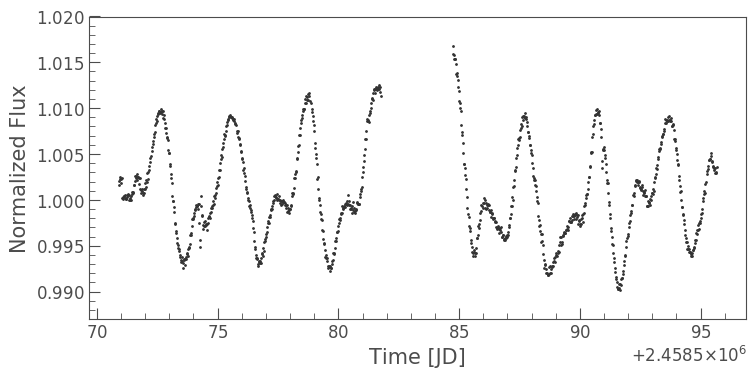

In [36]:
cdips.lc.scatter()

(-0.036995375, 0.036995375)

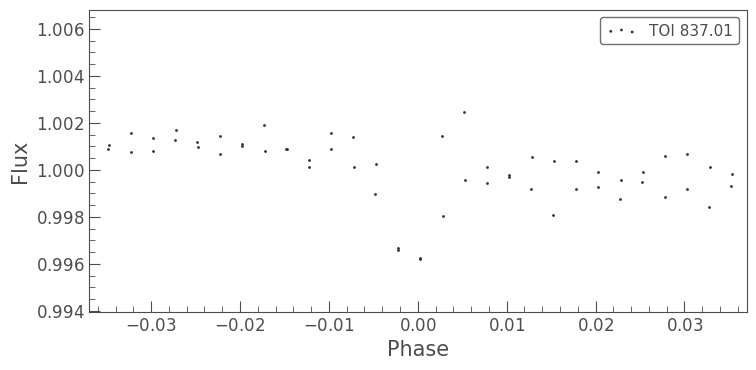

In [37]:
%matplotlib inline

toi = 837
#get ephemeris from TOI release (https://tev.mit.edu/data/)
d = cr.get_toi(toi=f'{toi}.01', verbose=False)
per, t0, dur = d[['Period (days)', 'Epoch (BJD)', 'Duration (hours)']].values[0]

t = cr.Target(toiid=toi, verbose=False)
t.query_gaia_dr2_catalog(return_nearest_xmatch=True)
#initialize cdips
cdips = cr.CDIPS(gaiaDR2id=t.gaiaid, sector=7, aper_idx=1, verbose=False)
#get lc and turn into lk.TessLightCurve
lc = cdips.lc
#add label
lc.label = f'TOI {toi}.01'
#plot
ax = lc.remove_outliers().flatten(window_length=51).fold(period=per, t0=t0).scatter()
ax.set_xlim([-dur/24/2,dur/24/2])

In [38]:
#multi sector
%matplotlib inline

toi = 837

#get ephemeris from TOI release (https://tev.mit.edu/data/)
d = cr.get_toi(toi=f'{toi}.01', verbose=False)
per, t0 = d[['Period (days)', 'Epoch (BJD)']].values[0]
        
t = cr.Target(toiid=toi, verbose=False)
#get gaia id
t.query_gaia_dr2_catalog(return_nearest_xmatch=True)
#initialize cdips

lcs = {}
#available sectors
for sector in t.get_all_sectors():
    try:
        cdips = cr.CDIPS(gaiaDR2id=t.gaiaid, sector=sector, aper_idx=3, verbose=False)
        #get lc and turn into lk.TessLightCurve
        lc = cdips.lc
        #add label
        lc.label = f'TOI {toi}.01'
        lcs[sector]=lc
    except:
        print(f'sector {sector} is not available.')

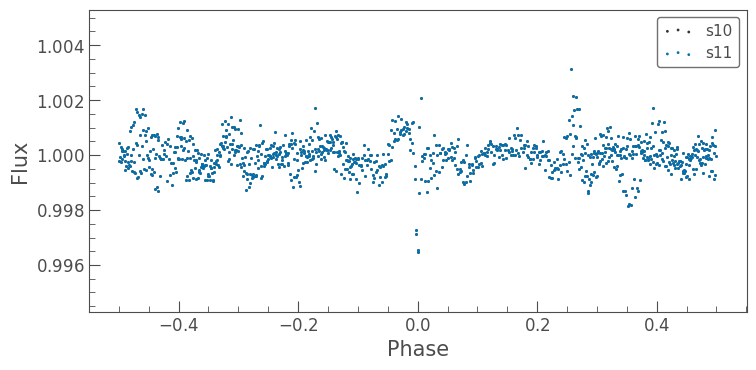

In [39]:
#plot
ax = lcs[10].remove_outliers().flatten(window_length=51).fold(period=per, t0=t0).scatter(label='s10')
lcs[11].remove_outliers().flatten(window_length=51).fold(period=per, t0=t0).scatter(ax=ax, label='s11')
# ax.set_xlim([-0.05,0.05])

## short cadence

In [7]:
import chronos as cr

s = cr.ShortCadence(toiid=837)

Available sectors: [10, 11]
Using sector=10.


In [8]:
s.ticid

460205581

### custom


Searching mast for TIC 460205581

2 tpf(s) found in sector(s) [10, 11]
Using data from sector 10 only


Applying data quality mask identified in Data Release Notes (sector 10):
t>1570.8762|t<1581.78453|t>1584.72342



Text(0.5, 1.0, 'TIC 460205581 (sector 10)')

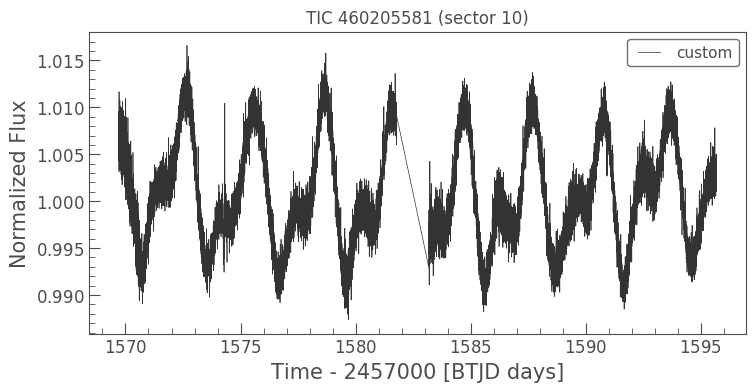

In [9]:
#custom lc
custom_lc = s.make_custom_lc(sap_mask='pipeline')
ax = custom_lc.plot(label='custom')
ax.set_title(f'TIC {s.ticid} (sector {s.sector})')

### pipeline lc: SAP and PDCSAP

Searching lightcurvefile for TIC 460205581 (sector 10)


Text(0.5, 1.0, 'TIC 460205581 (sector 10)')

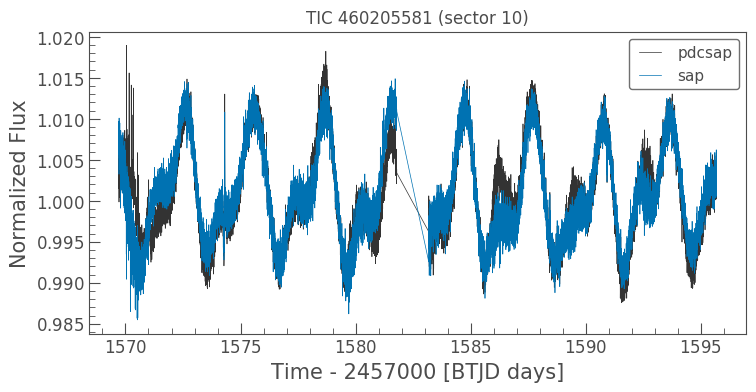

In [10]:
#get pipeline lc
pdcsap = s.get_lc(lctype='pdcsap')
ax = pdcsap.plot(label='pdcsap')

sap = s.get_lc(lctype='sap')
sap.plot(ax=ax, label='sap')
ax.set_title(f'TIC {s.ticid} (sector {pdcsap.sector})')

## K2 lightcurves

### everest

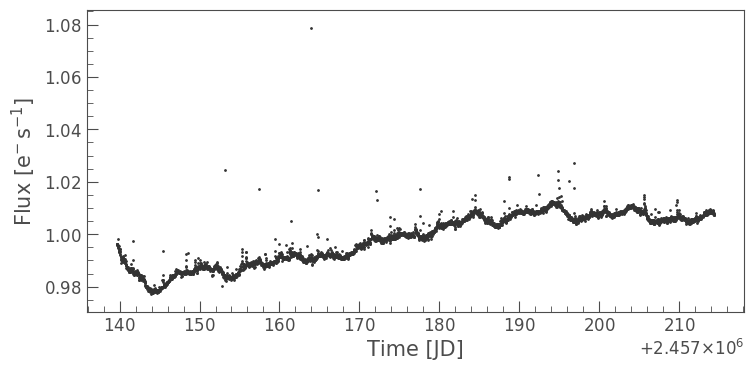

In [40]:
%matplotlib inline
import chronos as cr

eve = cr.Everest(epicid=211314705, campaign=5, verbose=False)
eve.lc.scatter()

### K2SFF

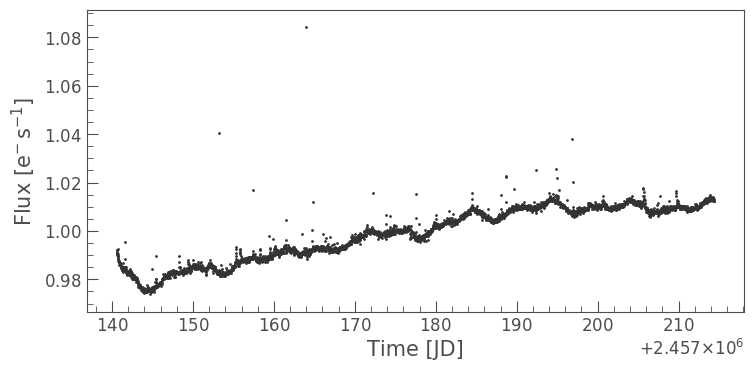

In [41]:
k2sff = cr.K2SFF(epicid=211314705, campaign=5, verbose=False)
k2sff.lc.scatter()